# Results evaluation

This notebook evaluates the machine learning model's performance

In [1]:
import numpy as np
import pandas as pd
import joblib
from src.utils import load_data
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    log_loss,
    recall_score,
    precision_score,
    average_precision_score,
    f1_score,
    plot_precision_recall_curve,
    plot_roc_curve
)

In [2]:
# Loading model and data
features_test, labels_test = load_data('test')
features_test, labels_test = load_data('train')
model = joblib.load('./models/best_model.pkl')

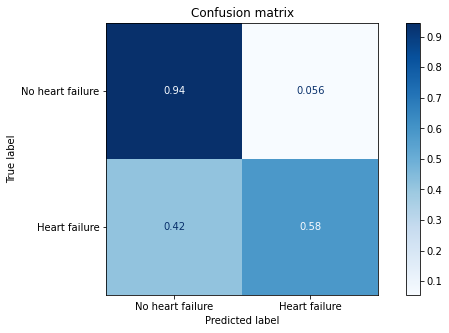

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
cm = plot_confusion_matrix(
    model, features_test, labels_test,
    display_labels=['No heart failure', 'Heart failure'],
    cmap=plt.cm.Blues,
    normalize='true',
    ax=ax
)

cm.ax_.set_title('Confusion matrix')
plt.show()


In [4]:
# Other metrics
labels_pred_test = model.predict(features_test)
labels_pred_test_prob = model.predict_proba(features_test)[:, 1]

print('accuracy:', accuracy_score(labels_test, labels_pred_test))
print('precision:', precision_score(labels_test, labels_pred_test))
print('recall:', recall_score(labels_test, labels_pred_test))
print('f1:', f1_score(labels_test, labels_pred_test))
print('auc:', roc_auc_score(labels_test, labels_pred_test_prob))
print('auprc:', average_precision_score(labels_test, labels_pred_test))
print('log_loss', log_loss(labels_test, labels_pred_test_prob))


accuracy: 0.8284518828451883
precision: 0.8333333333333334
recall: 0.5844155844155844
f1: 0.6870229007633588
auc: 0.9017957351290686
auprc: 0.6209042004021084
log_loss 0.43282635614740206


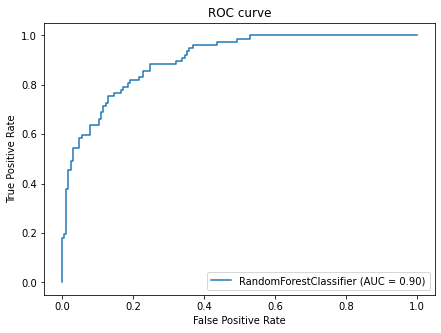

In [5]:
fig, ax = plt.subplots(figsize=(7, 5))
roc = plot_roc_curve(model, features_test, labels_test, ax=ax)
roc.ax_.set_title('ROC curve')
plt.show()

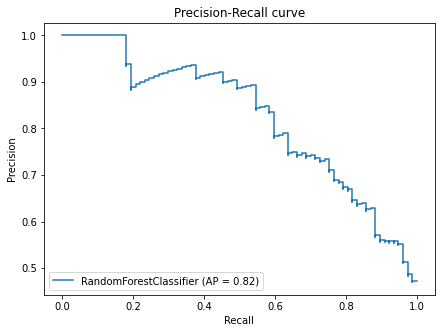

In [6]:
fig, ax = plt.subplots(figsize=(7, 5))
prc = plot_precision_recall_curve(model, features_test, labels_test, ax=ax)
prc.ax_.set_title('Precision-Recall curve')
plt.show()

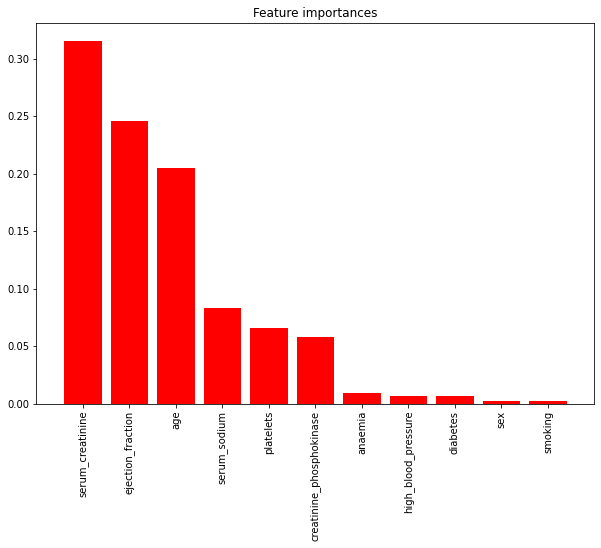

In [7]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,7))
plt.title("Feature importances")
plt.bar(range(features_test.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(features_test.shape[1]), [features_test.columns[i] for i in indices], rotation=90)
plt.xlim([-1, features_test.shape[1]])
plt.show()